# COUNTRY PROFILING

## Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### In this notebook, I tried to analyze country profiling data using various clustering techniques. Namely
### 1.PCA Decomposition (Dimensionality Reduction)
### 2.K-Means Clustering (Centroid Based) Clustering
### 3.Hierarchical (Divisive and Agglomerative) Clustering


In [23]:
#descriptions

#### Importing LIbraries

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing

# For Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#import missingno as msno

# For scaling the data
from sklearn.preprocessing import StandardScaler

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA,IncrementalPCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Reading the Datafile

In [25]:
data = pd.read_csv('Country-data.csv')

#### Exploatory Data Analysis

##### <font color='red'>Shape and Head of the data</font>

In [26]:
#Shape of dataset
print("There are {} countries and {} features: ".format(data.shape[0],data.shape[1]))
#Reading the first 5 rows of the dataset
data.head()

There are 167 countries and 10 features: 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### <font color='red'>Data Conversion</font>

Converting exports, health and imports variables into specified percentages of GDPP

In [27]:
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100
print('After Conversion')
data.head()

After Conversion


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


##### <font color='red'>Visualising Missing Values</font>

Check for Null & Nan values

In [28]:
print('Null values: \n{}'.format(data.isnull().sum()))
print('\nNaN values: \n{}'.format(data.isna().sum()))

Null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

NaN values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


##### <font color='red'>Datatypes of variables</font>

In [29]:
# Checking the datatypes of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### <font color='red'>Finding Duplicates</font>

In [30]:
#finding duplicates
print('There are {} duplicates in dataset'.format(len(data[data.duplicated()])))

There are 0 duplicates in dataset


##### <font color='red'>Describing Data</font>

In [31]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


##### <font color='red'>Correlation Heatmap</font>

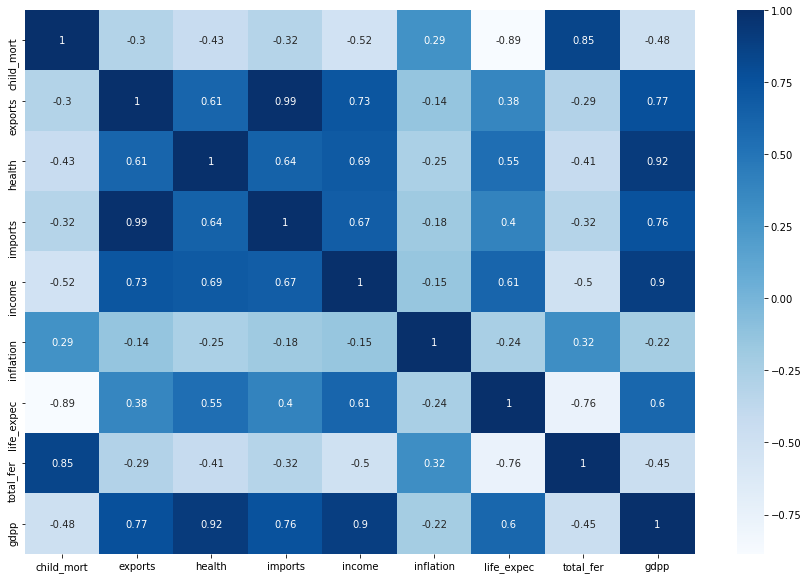

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

From the above correleation heatmap, we can get the following insights:          

 exports is highly correlated with imports.         
 health, exports, income,imports are highly correlated with gdpp.         
 child_mort is having high negative correlation with life_expec.        
 total_fer is highly positively correlated with child_mort and negatively correlated with life_expec

##### <font color='red'>Univariate & Bivariate Analysis</font>

#### <font color='green'>Univariate Analysis - BOXPLOT for each Numerical Variable</font>

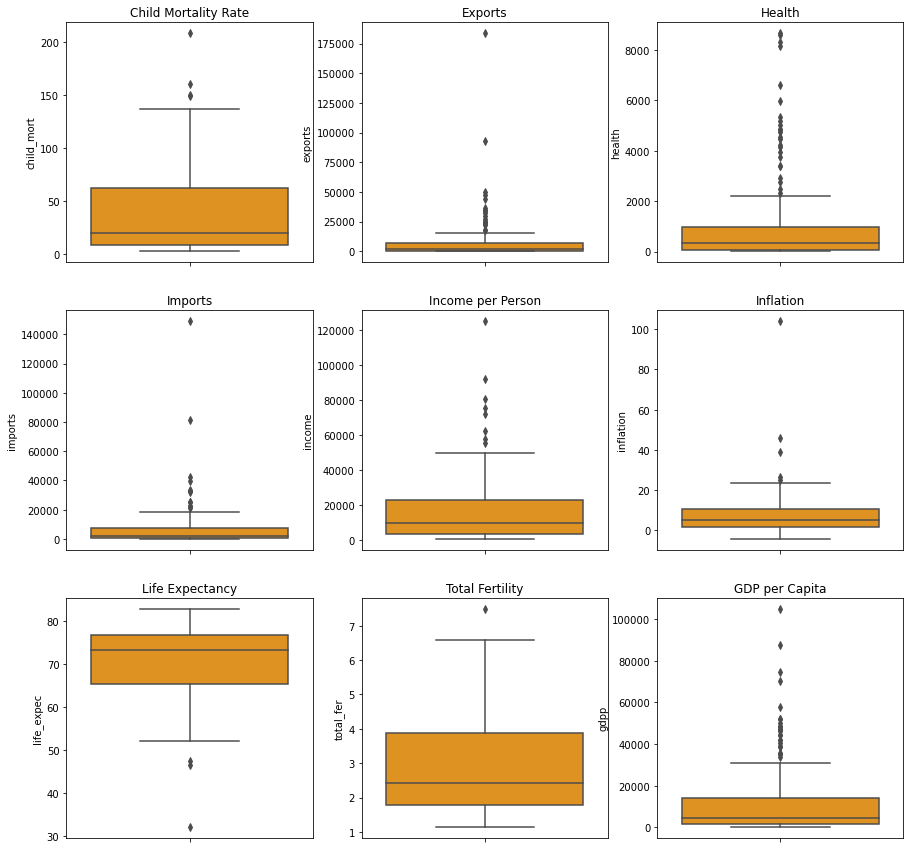

In [33]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
s=sns.boxplot(y=data.child_mort,ax=axes[0, 0],color="#FC9803")
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=data.exports,ax=axes[0, 1],color="#FC9803")
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=data.health,ax=axes[0, 2],color="#FC9803")
axes[0, 2].set_title('Health')

s=sns.boxplot(y=data.imports,ax=axes[1, 0],color="#fc9803")
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=data.income,ax=axes[1, 1],color="#fc9803")
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=data.inflation,ax=axes[1, 2],color="#fc9803")
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=data.life_expec,ax=axes[2, 0],color="#fc9803")
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=axes[2, 1],color="#fc9803")
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=axes[2, 2],color="#fc9803")
axes[2, 2].set_title('GDP per Capita')

plt.show()

From the above table, I conclude the following points:         

 There is atleast one outlier in all the features.        
 In case of gdpp and health, there are too many outliers.      
 Since we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.        
 There could be a possibility in child_mort's subplot where those outliered-countries could be the needy ones because of the high child-mortality rate.           
 Removing outliers is not a good option as per the above conditions. Hence, I choose to KEEP outliers.

#### <font color='green'>Pair Plot</font>

##### Univariate Analysis - KDE
##### Bivariate Analysis - Scatterplot

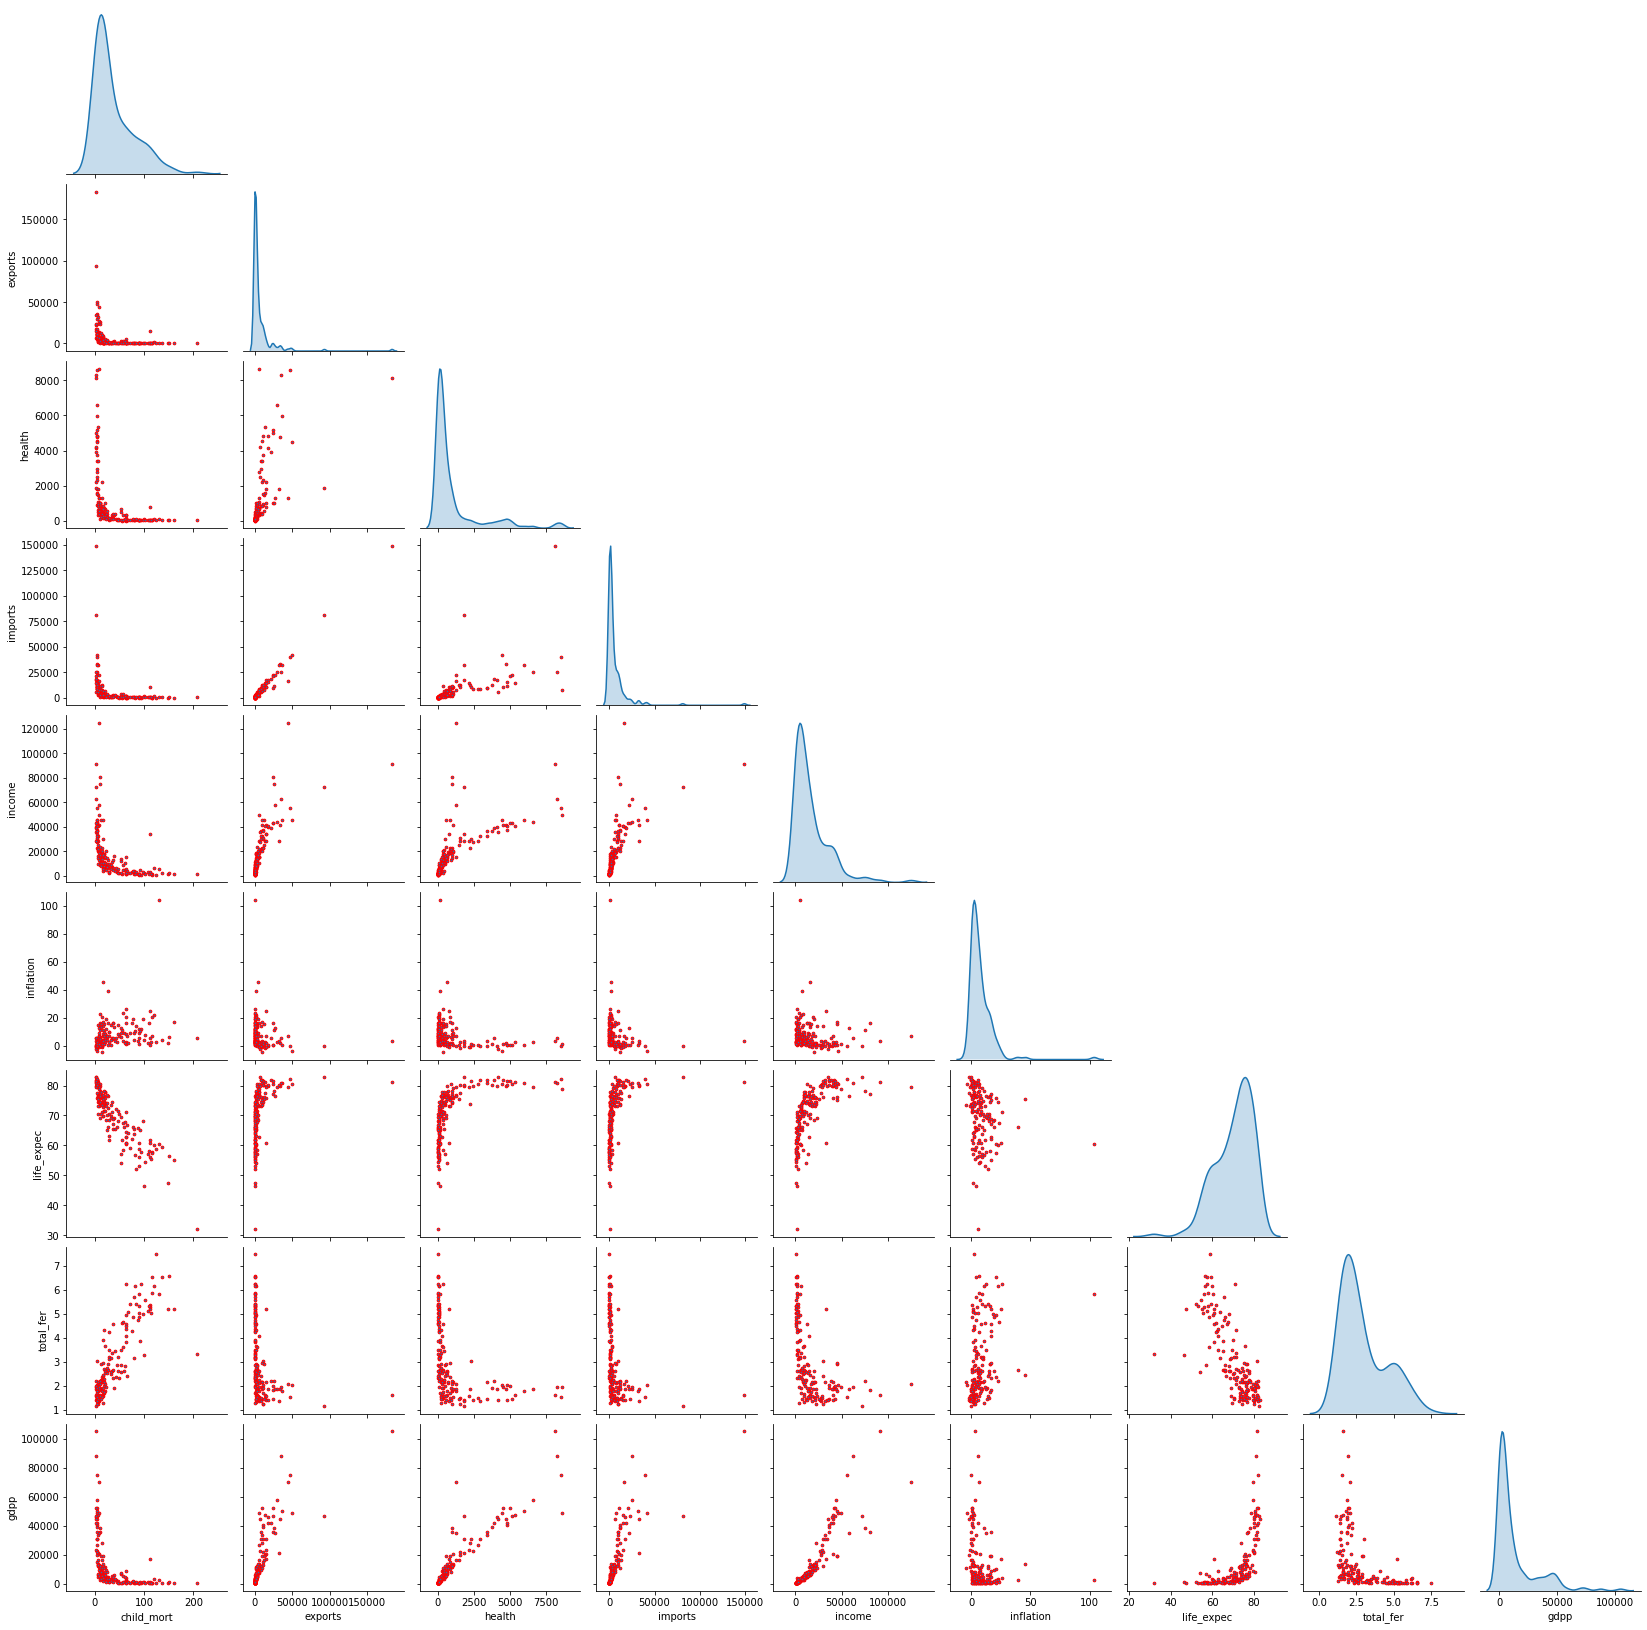

In [34]:
pair2=sns.pairplot(data,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=1))

From the above plot, I conclude the following points:

#### Univariate Analysis
1. Only Inflation is right-skewed whereas all the rest features are left-skewed.
2. total_fer and gdpp are bimodal whereas all the rest features are unimodal.

#### Bivariate Analysis
1. Linear relation is found between gdpp-income,imports-exports,total_fer-child_mort
2. Rectangular hyperbola curve is generated by gdpp-child_mort.
3. If gdpp is HIGH:
    > child mortality is LOW  
    > income is HIGH   
    > inflation is LOW   
    > life expectancy is HIGH   
    > total fertility is LOW   
    > health, imports and exports are MEDIUM

#### Scaling Data with StandardScaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

In [35]:
# Droping string feature country name.
features=data.drop('country',1) 

#creating scaler object 
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)
features_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Feature Selection

Feature Selection is a technique which is used when we you know the target variable(Supervised Learning)

When we talk with respect to Unsupervised Learning, there is no exact technique which could do that. But there is something which can help us in those lines i.e., Dimensionality Reduction, this technique is used to reduce the number of features and give us the features which explains the most about the dataset. The features would be derived from the existing features and might or might not be the same features

#### Linear Discriminant Analysis

 As we have dealing with unsupervised learning and LDA is a supervised learning so can't be applied in our dataset

#### Principal Component Analysis

PCA is used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data and in our dataset we have highly correlated data.

In [36]:
#creating pca object
pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
pca.fit(features_scaled)
#checking components
print("{} pca components.\nList of components\n{}".format(pca.n_components_,pca.components_))

9 pca components.
List of components
[[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
   0.34385651 -0.30284224  0.39998795]
 [ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
  -0.36981973  0.4597152   0.2006241 ]
 [-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
   0.19675173 -0.07783431  0.01033941]
 [-0.14805195  0.44942527 -0.59971228  0.46179779 -0.15480592 -0.00762798
  -0.01839465 -0.21392805 -0.36477239]
 [ 0.1019948  -0.03853829 -0.49319984 -0.2527867   0.79407469 -0.13642345
  -0.15404105 -0.02033568  0.08750149]
 [ 0.19658519 -0.03891112  0.18069888 -0.01217988 -0.03814681  0.10840284
  -0.58600986 -0.75390075  0.04538167]
 [ 0.76126725 -0.01366973 -0.06461567  0.02718244 -0.02311312 -0.02207663
   0.58120846 -0.27314534 -0.04402264]
 [ 0.00644411 -0.05526371  0.43007213  0.1311355   0.3938113  -0.00607016
   0.002966    0.03429334 -0.79902242]
 [-0.00495137 -0.71792388 -0.13034593  0.66568664  0.079011

##### <font color='red'>Scree Plot</font>

Now, from the above Principal components how many should be taken into consideration is seen through the Scree plot. "Elbow point" determines the correct number of PCs to use.

Choosing the number of components is related to the amount of variance that is explained.

We use Explained Variance Ratio as a metric to evaluate the usefulness of our principal components and to choose how many components to use in your model. The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 

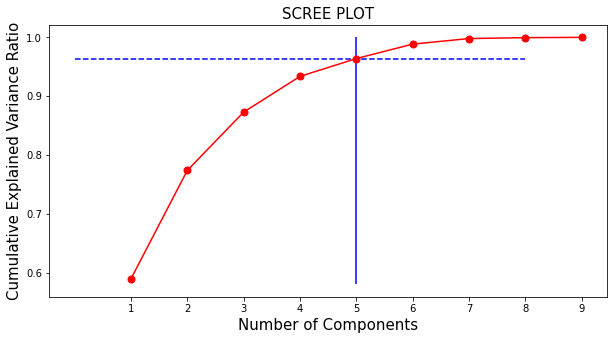

In [38]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
comp=range(1,pca.n_components_+1)
plt.plot(comp,np.cumsum(pca.explained_variance_ratio_),marker='o',markersize=7,color='r')
plt.title('SCREE PLOT',fontsize=15)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=15)

plt.show()

From above scree plot, Around 96% of the information is being explained by 5 components.

##### <font color='red'>Visualising PCA Components</font>

In [39]:
#creating dataframe of first 5 PCA Components
colnames = list(features.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


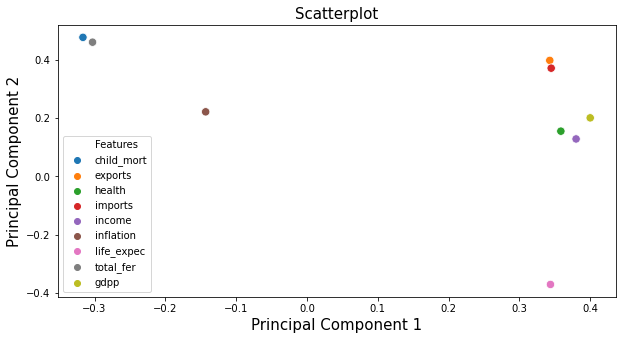

In [40]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
sns.scatterplot(pca_data.PC1, pca_data.PC2,hue=pca_data.Features,marker='o',s=70)
plt.title('Scatterplot',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)

plt.show()

 From the above plot, we can see the first component is in the dirction where the imports, exports, gdpp,income, health,life_expec are heavy and second component is in the direction where child_mort , total_fer is more.       
If we recall, correlation between imports and exports was 0.99. Now we can surely confirm it by looking the above plot.

### Now, we go ahead with our preprocessed data i.e. "pca_data"

#### K-Means Clustering

In [42]:
#creating list for no. of clusters
x=list(range(1,10))
plt.figure(figsize=(10,5))
ssd = []
#iterating ks values and fitting each value to the kmeans model
for num_clusters in x:
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(pca_data.iloc[:,:5])
    ssd.append(model.inertia_)

<Figure size 720x360 with 0 Axes>

##### <font color='red'>Elbow Method</font>

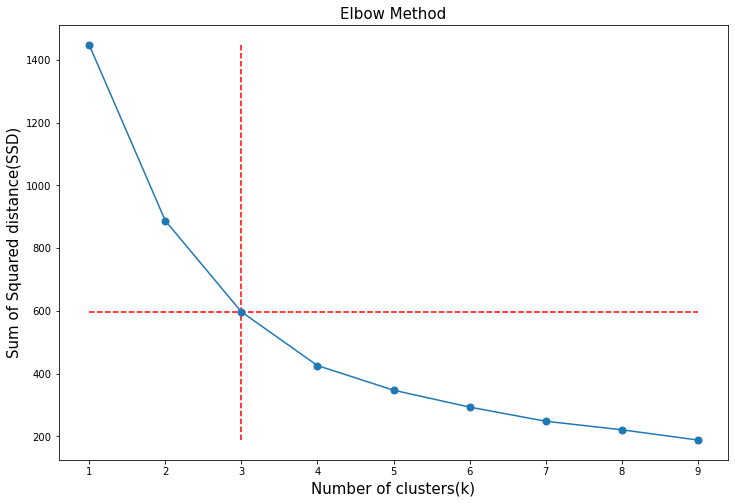

In [77]:
plt.figure(figsize = (12,8))
plt.plot(x,ssd,marker='o',markersize=7)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="--")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters(k)',fontsize=15)
plt.ylabel('Sum of Squared distance(SSD)',fontsize=15)

plt.show()

##### <font color='red'>Silhoutee Analysis</font>

In [84]:
from sklearn.metrics import silhouette_score
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_data.iloc[:,:5])
       
    # silhouette score
    silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44578361408552347
For n_clusters=3, the silhouette score is 0.5261781697729251
For n_clusters=4, the silhouette score is 0.5265198905439799
For n_clusters=5, the silhouette score is 0.5329571762006644
For n_clusters=6, the silhouette score is 0.5000455954181472
For n_clusters=7, the silhouette score is 0.32376303715123855
For n_clusters=8, the silhouette score is 0.32468235244721755


<font color='blue'>**Silhoutee Analysis indicated us towards 3, 4 or 5 clusters in our data whereas elbow method gave a clear indication towards 3 clusters. Hence, Optimal number of clusters will be 3.**</font>

##### <font color='red'>Visualising clusters on components</font>

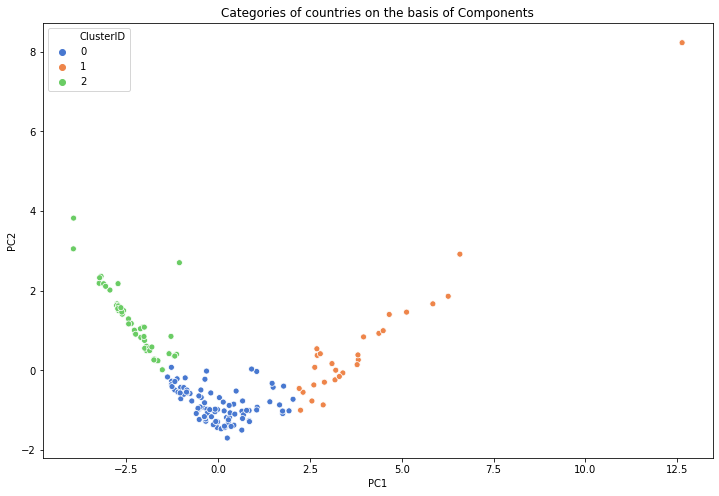

In [45]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
kmeans.fit(pca_data.iloc[:,:5])
#adding produced labels to pca_data 
pca_data['ClusterID']= pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pca_data,palette="muted")
plt.title('Categories of countries on the basis of Components')

plt.show()

From above plots, we can clearly see the 3 clusters .

Now we are merging clusters with the original dataset.

In [51]:
final_df=pd.merge(data,pca_data.loc[:,'ClusterID'], left_index=True,right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


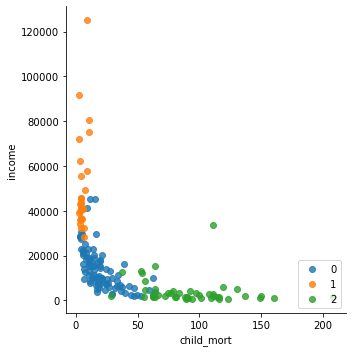

In [52]:
sns.lmplot(x='child_mort', y='income', data=final_df, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

Cluster 2 countries are low in income and high in child mortality

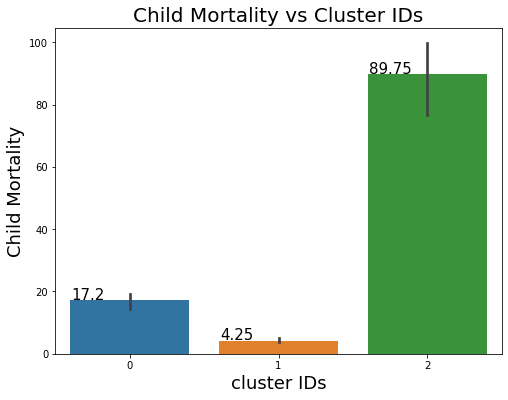

In [56]:
plt.figure(figsize=(8,6))
figx=sns.barplot(x='ClusterID', y='child_mort',estimator=np.median, data=final_df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Child Mortality",fontsize=18,color='black')
plt.title("Child Mortality vs Cluster IDs",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

Countries with high gdpp and low child mortality are Developed countries         
Countries with low gdpp and low child mortality are Developing countries        
Countries with low gdpp and high child mortality are Under-developing countries        
Therefore let's rename indexes as:          

ClusterID 0 = Developing countries        
ClusterID 1 = Developed countries            
ClusterID 2 = Under-developed countries      

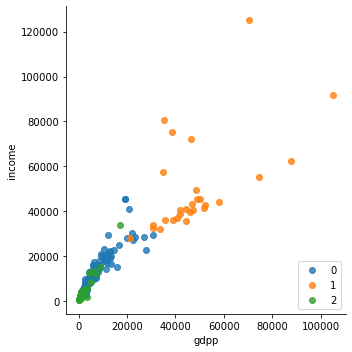

In [53]:
sns.lmplot(x='gdpp', y='income', data=final_df, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

In [47]:
#calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_GDPP=pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
Cluster_income=pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,7979.912088,20.357143,13968.021978
1,48114.285714,5.046429,50178.571429
2,1909.208333,91.610417,3897.354167


Analysing the clusters by comparing how the [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

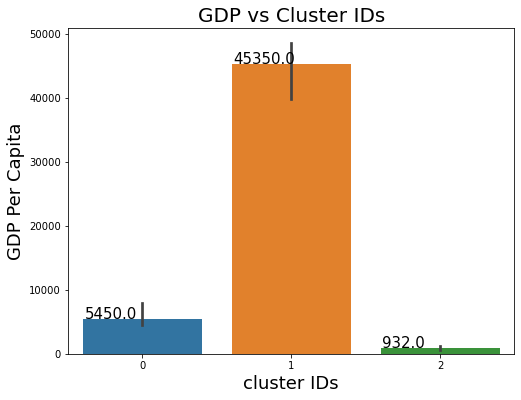

In [54]:
plt.figure(figsize=(8,6))
fig=sns.barplot(x='ClusterID', y='gdpp',estimator=np.median,data=final_df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("GDP Per Capita",fontsize=18,color='black')
plt.title("GDP vs Cluster IDs",fontsize=20,color='black')

for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

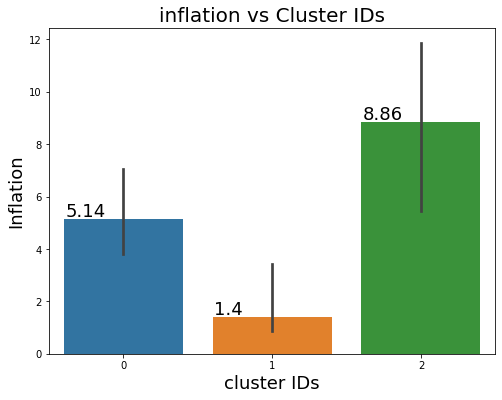

In [57]:
plt.figure(figsize=(8,6))
fig3=sns.barplot(x='ClusterID', y='inflation',estimator=np.median,data=final_df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Inflation",fontsize=18,color='black')
plt.title("inflation vs Cluster IDs",fontsize=20,color='black')

# set individual bar lables using above list
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()+.01, i.get_height()+0.1, \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.show()

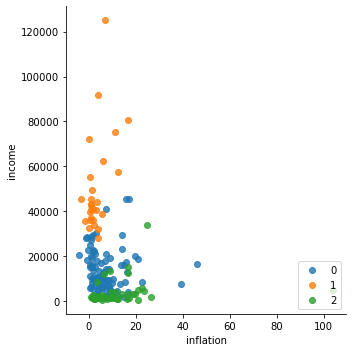

In [58]:
sns.lmplot(x='inflation', y='income', data=final_df, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

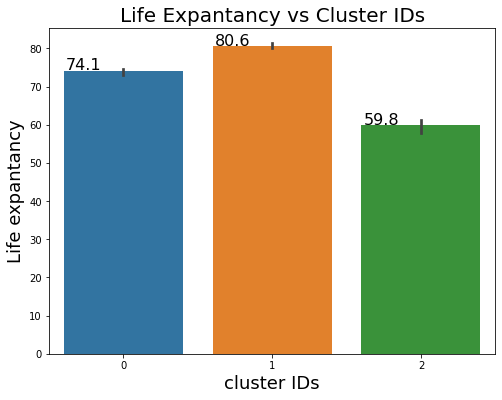

In [59]:
plt.figure(figsize=(8,6))
fig4=sns.barplot(x='ClusterID', y='life_expec',estimator=np.median,data=final_df)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Life expantancy",fontsize=18,color='black')
plt.title("Life Expantancy vs Cluster IDs",fontsize=20,color='black')

for i in fig4.patches:
    fig4.annotate(format(i.get_height()), (i.get_x()+0.015, i.get_height()+0.25),fontsize=16)

plt.show()

Some observations from above analysis
> Life expantancy is lowest in cluster-2.
> Inflation is highest in cluster-2.
> cluster -2 counteries are low in GDP. Whereas Cluster 1 has highest GDP.
> Child mortatlity is highest in cluster-2 countries.

Following are some observations from above Analysis:
  > Life expentancy is lowest in cluster 2
  
  > Inflation is highest in cluster 2
  
  > Cluster 2 countries are low in GDP whereas Cluster 1 has highest gdp countries
  
  > Child moratlity is lowest in Cluster 1 whereas highest in cluster 2.
  
 
Given above obseravations, Lets rename the clusters on what we can understand as developed and under developed countires.

In [76]:
K_mean_df.rename(index={0: 'Developing'},inplace=True)
K_mean_df.rename(index={1: 'Developed'},inplace=True)
K_mean_df.rename(index={2: 'Under-developed'},inplace=True)

##### <font color='red'>Clusters based comparisons</font>

##### <font color='green'>BarPlot</font>

Above charts show that,          

All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.         
All the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.         
All the developed countries are having low number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and poor countries are having the least death rate.

##### <font color='green'>ScatterPlot</font>

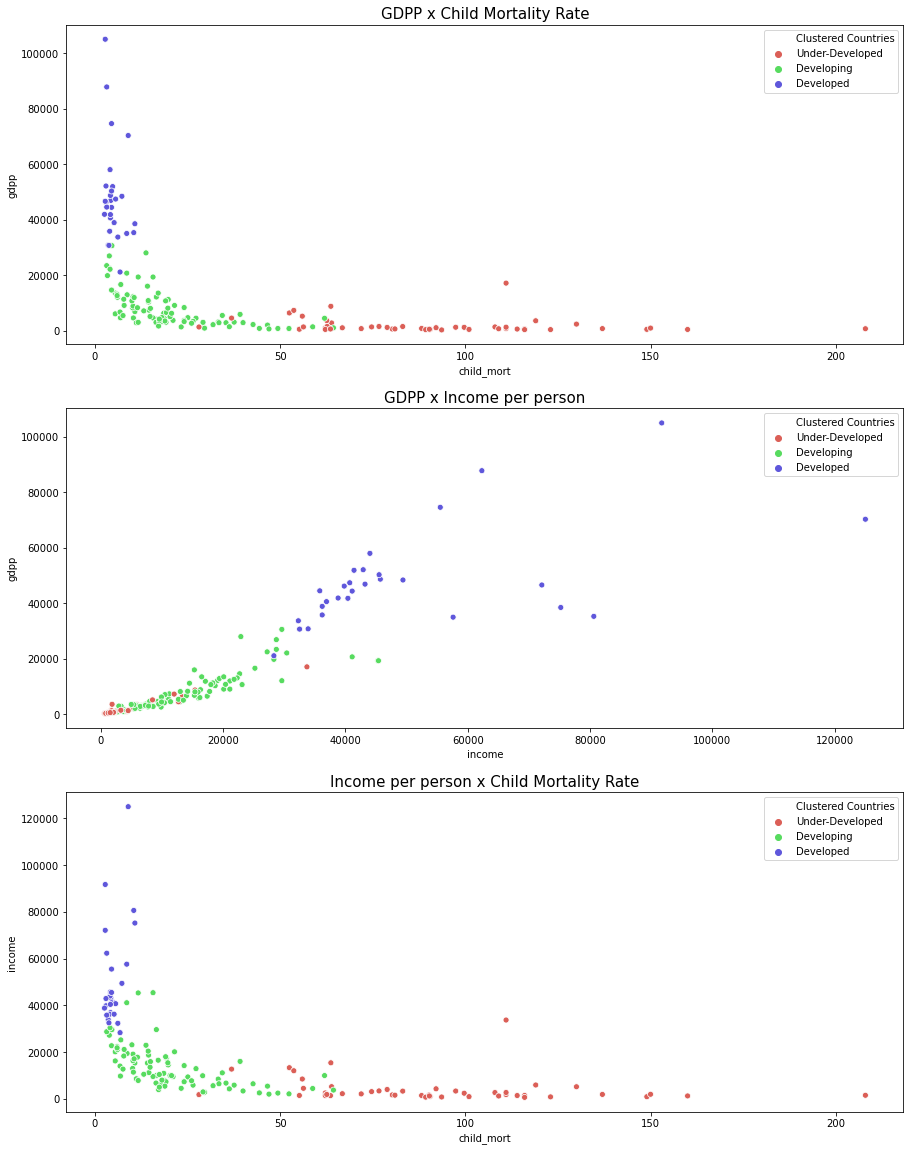

In [61]:
for i,cluster in enumerate(final_df.ClusterID):
    if(cluster==0):
        final_df.loc[i,'Clustered Countries']='Developing'
    elif(cluster==1):
        final_df.loc[i,'Clustered Countries']='Developed'
    else:
        final_df.loc[i,'Clustered Countries']='Under-Developed'
        
f, axes = plt.subplots(3, 1, figsize=(15,20))
s=sns.scatterplot(x='child_mort',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[0])
axes[0].set_title('GDPP x Child Mortality Rate',fontsize=15)
s=sns.scatterplot(x='income',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[1])
axes[1].set_title('GDPP x Income per person',fontsize=15)
s=sns.scatterplot(x='child_mort',y='income',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[2])
axes[2].set_title('Income per person x Child Mortality Rate',fontsize=15)

plt.show()

From above scatter plot :        

In gdpp x child_mort, there is some clustering where gdpp is more, there child-mort is low, which is a FACT.   
In gdpp x income, there is some clustering where gdpp is more, then income is also more.    
In income x child_mort, there is some clustering where if child_mort is more, then income is less.

##### <font color='green'>BoxPlot</font>

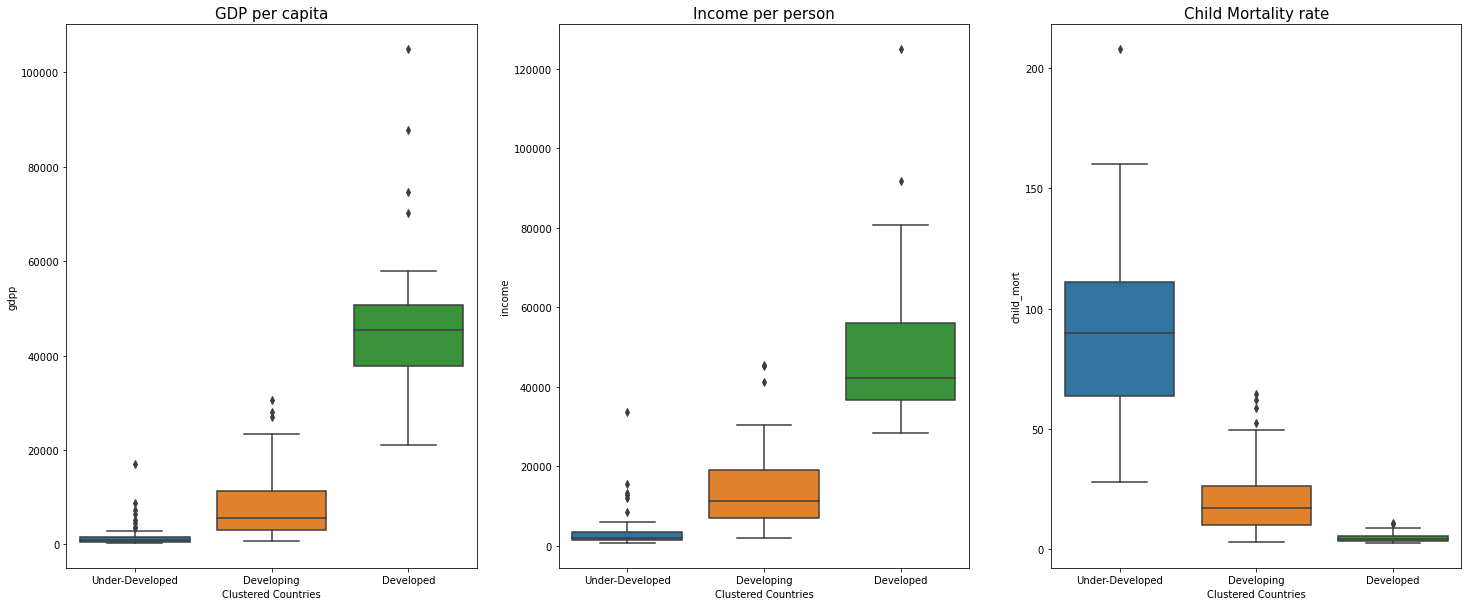

In [63]:
f, axes = plt.subplots(1, 3, figsize=(25,10))
sns.boxplot(x='Clustered Countries',y='gdpp',data=final_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='Clustered Countries',y='income',data=final_df,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='Clustered Countries',y='child_mort',data=final_df,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
s.get_figure().savefig('comparison subplots.png')
plt.show()

##### <font color='red'>Bar Charts of clustered countries wrt gdpp, income, child mortality</font>

##### Developed Countries      
##### Developing Countries      
##### Under-Developed Countries

##### <font color='green'>Developed Countries</font>

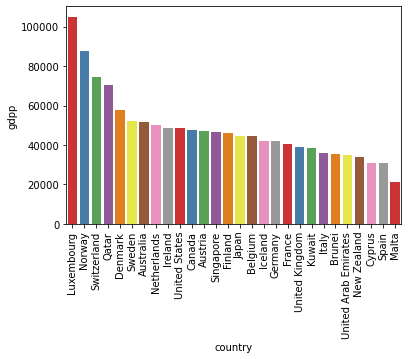

In [64]:
gdp_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developed Countries GDPP Ranking',fontsize=15)

plt.show()

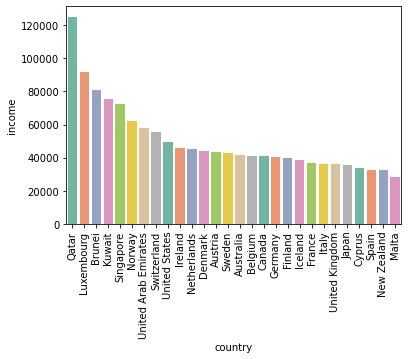

In [65]:
income_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_developed,palette='Set2')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developed Countries Income Ranking',fontsize=15)
plt.show()

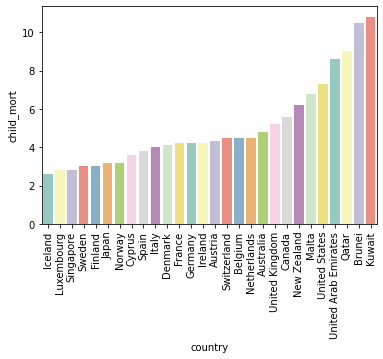

In [66]:
child_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_developed,palette='Set3')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developed Countries Child mortality Ranking',fontsize=15)
plt.show()

In [67]:
#top 10 developed countries based on GDPP
print('Top 10 developed countries based on high GDPP\n')
for countries in gdp_developed.country[:10]:
    print(countries)

#top 10 developed countries based on income
print('\nTop 10 developed countries based on high income\n')
for countries in income_developed.country[:10]:
    print(countries)
    
#top 10 developed countries based on childmort
print('\nTop 10 developed countries based on child low mortality\n')
for countries in child_developed.country[:10]:
    print(countries)

Top 10 developed countries based on high GDPP

Luxembourg
Norway
Switzerland
Qatar
Denmark
Sweden
Australia
Netherlands
Ireland
United States

Top 10 developed countries based on high income

Qatar
Luxembourg
Brunei
Kuwait
Singapore
Norway
United Arab Emirates
Switzerland
United States
Ireland

Top 10 developed countries based on child low mortality

Iceland
Luxembourg
Singapore
Sweden
Finland
Japan
Norway
Cyprus
Spain
Italy


##### <font color='green'>Developing Countries</font>

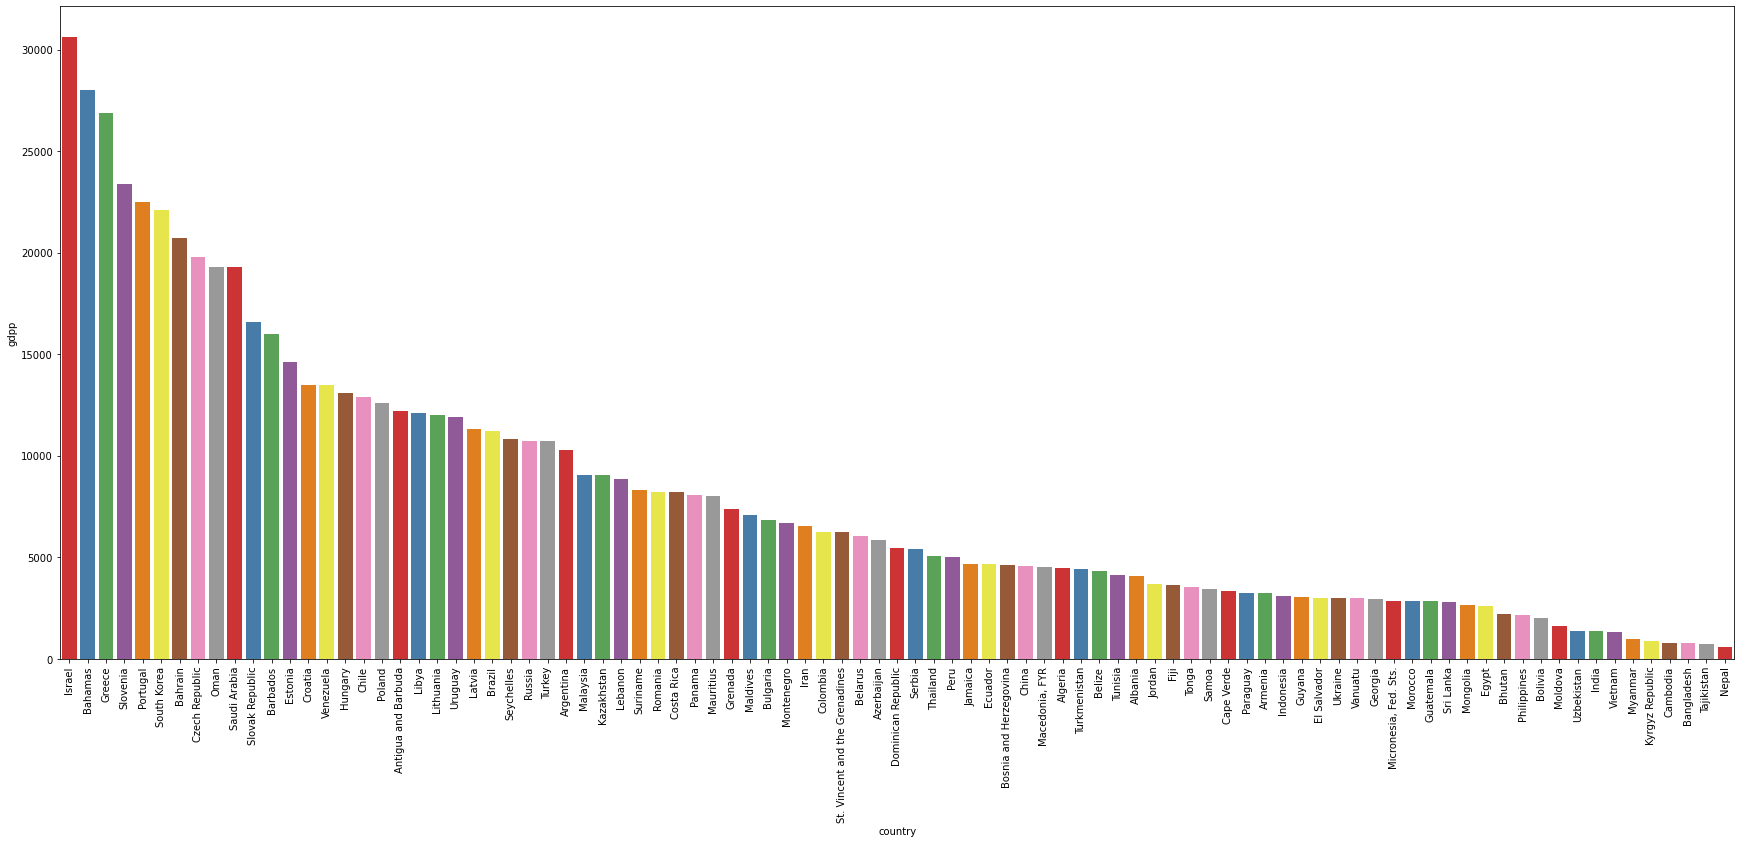

In [68]:
plt.figure(figsize=(30,12))
gdp_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developing,palette='Set1')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developing Countries GDPP Ranking',fontsize=15)

plt.show()

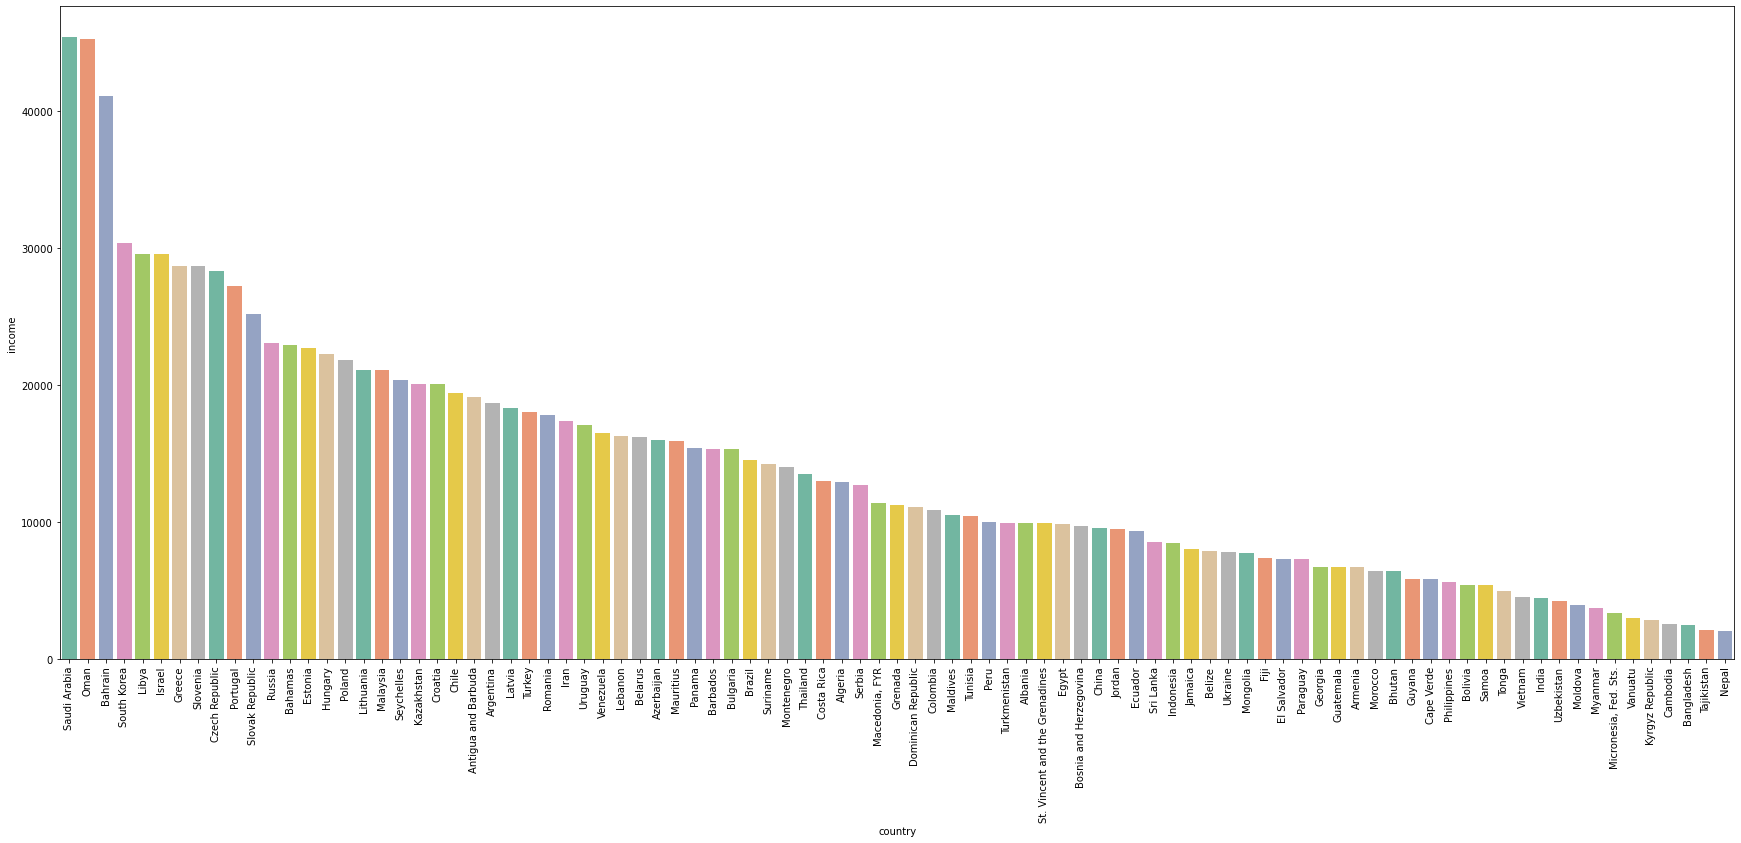

In [69]:
plt.figure(figsize=(30,12))
income_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_developing,palette='Set2')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developing Countries Income Ranking',fontsize=15)
plt.show()

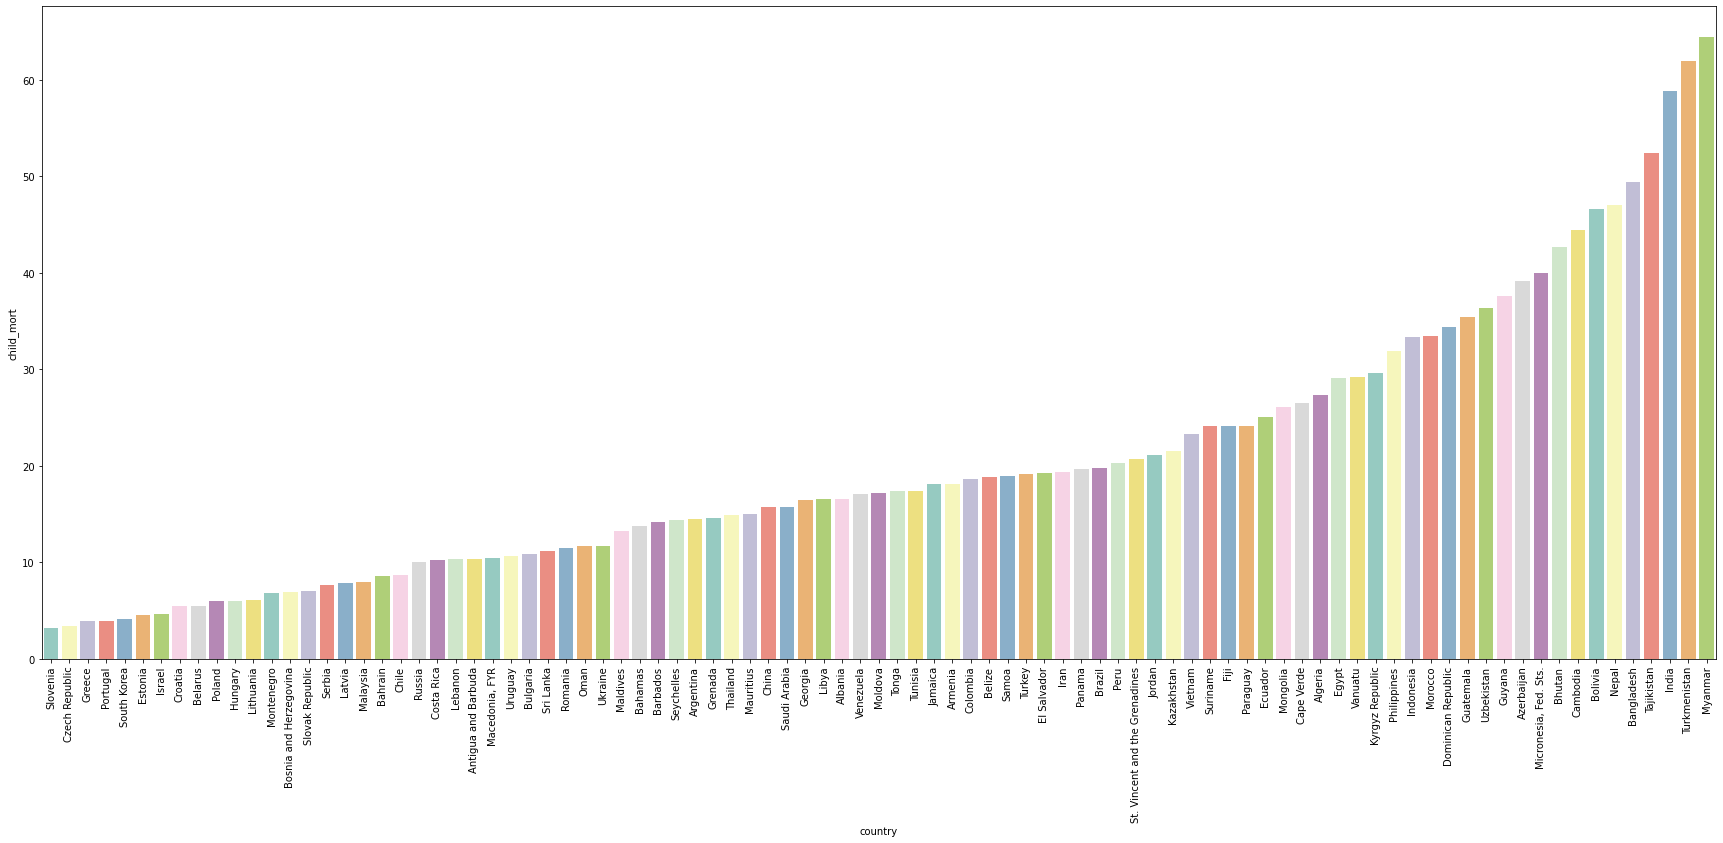

In [70]:
plt.figure(figsize=(30,12))
child_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_developing,palette='Set3')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developing Countries Child mortality Ranking',fontsize=15)
plt.show()

##### <font color='green'>Under-Developed Countries</font>

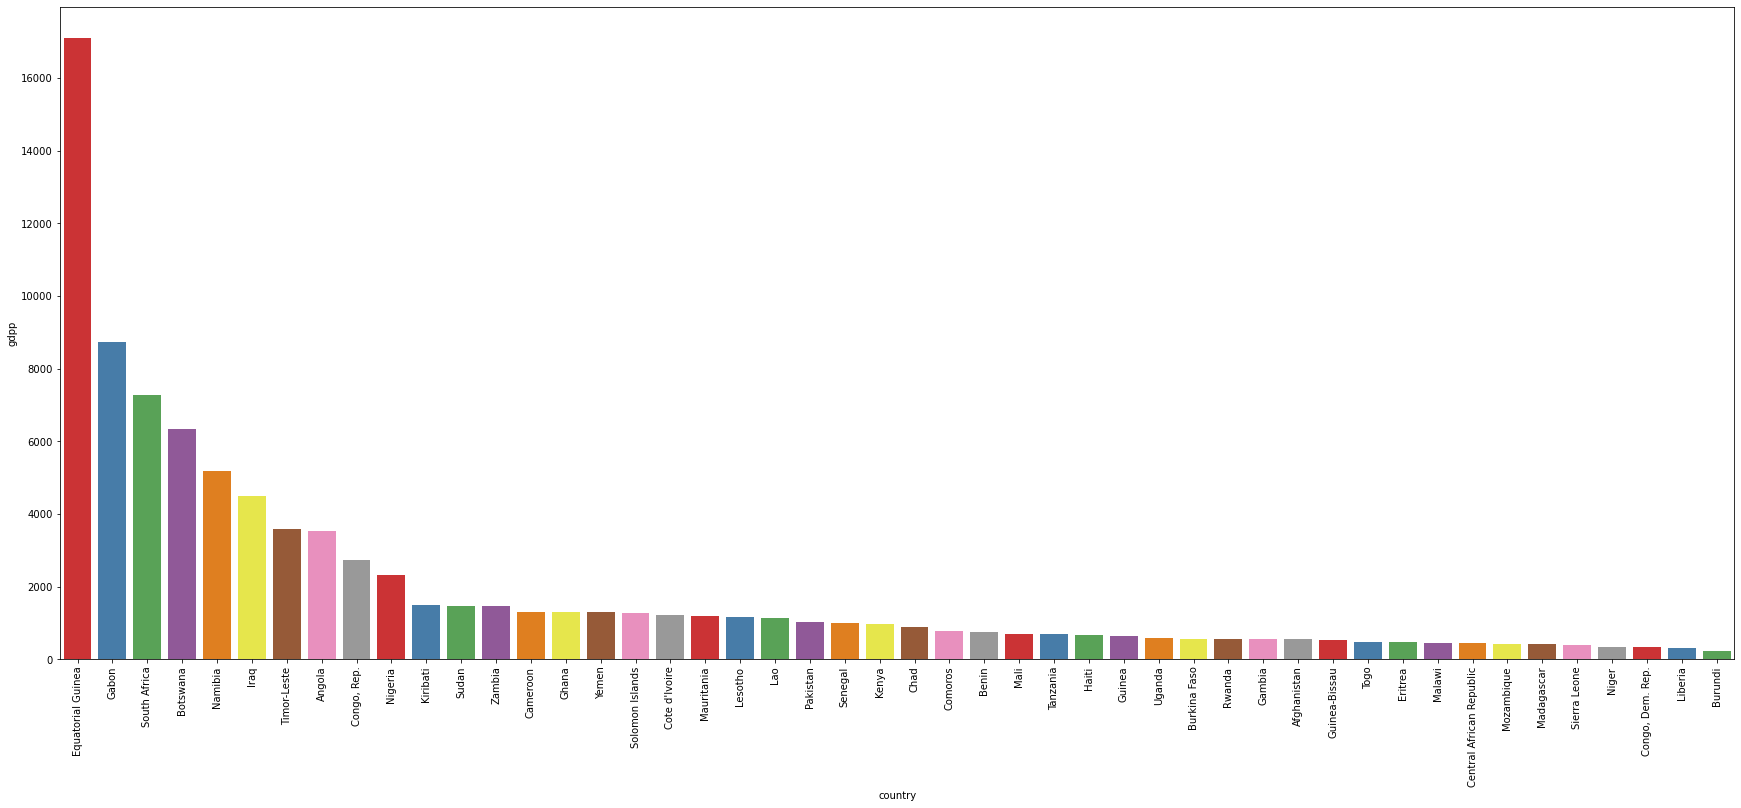

In [71]:
plt.figure(figsize=(30,12))

gdp_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_under,palette='Set1')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Under-Developed Countries GDPP Ranking',fontsize=15)

plt.show()

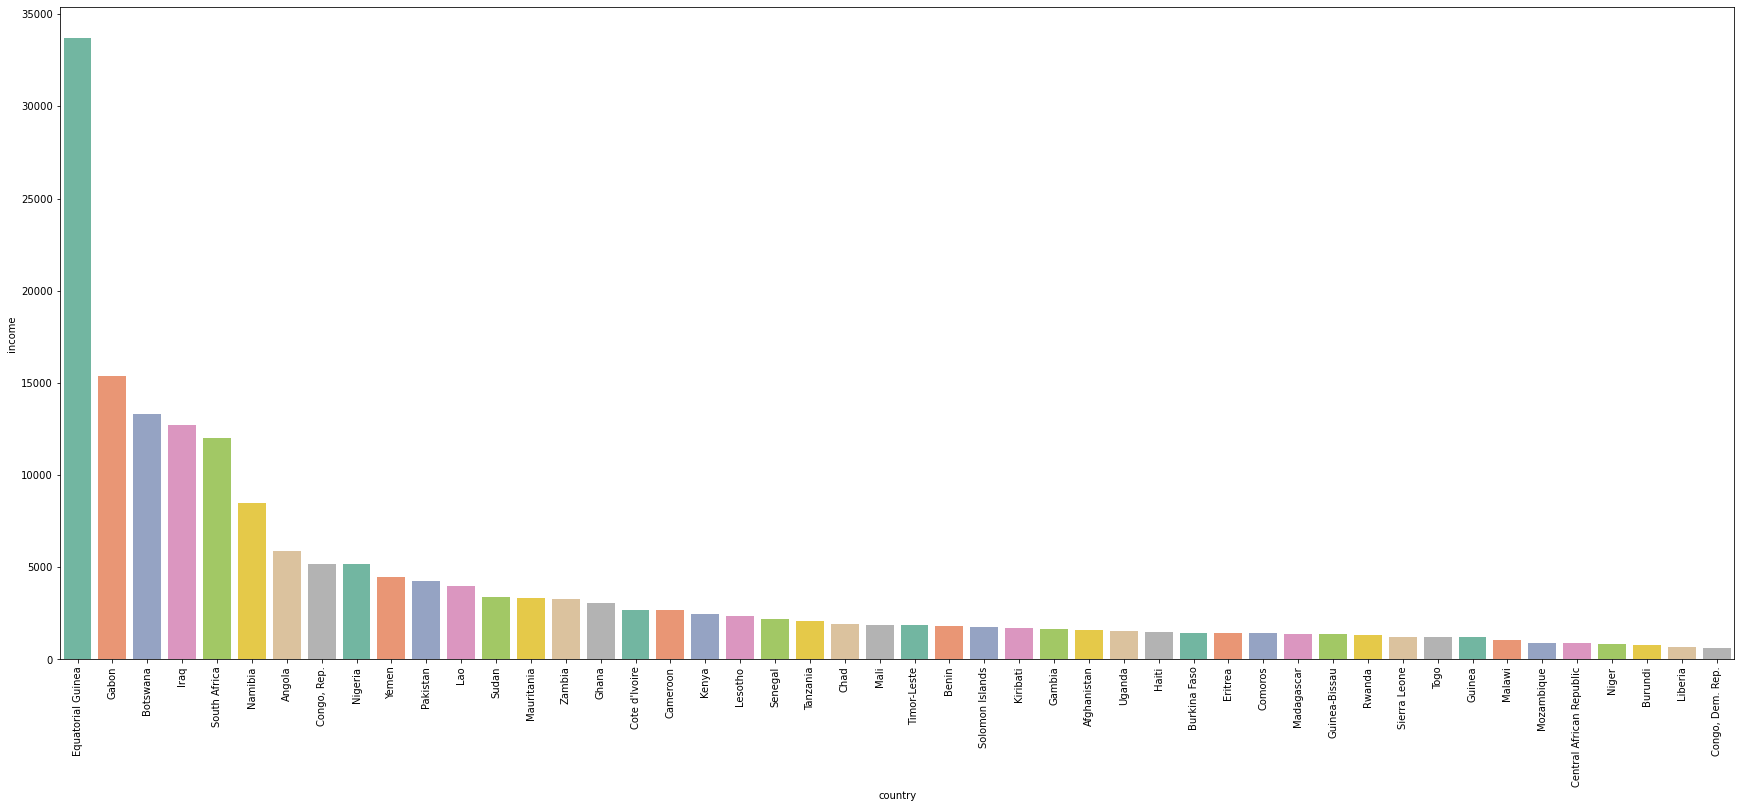

In [72]:
plt.figure(figsize=(30,12))
income_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_under,palette='Set2')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Under-Developed Countries Income Ranking',fontsize=15)
plt.show()

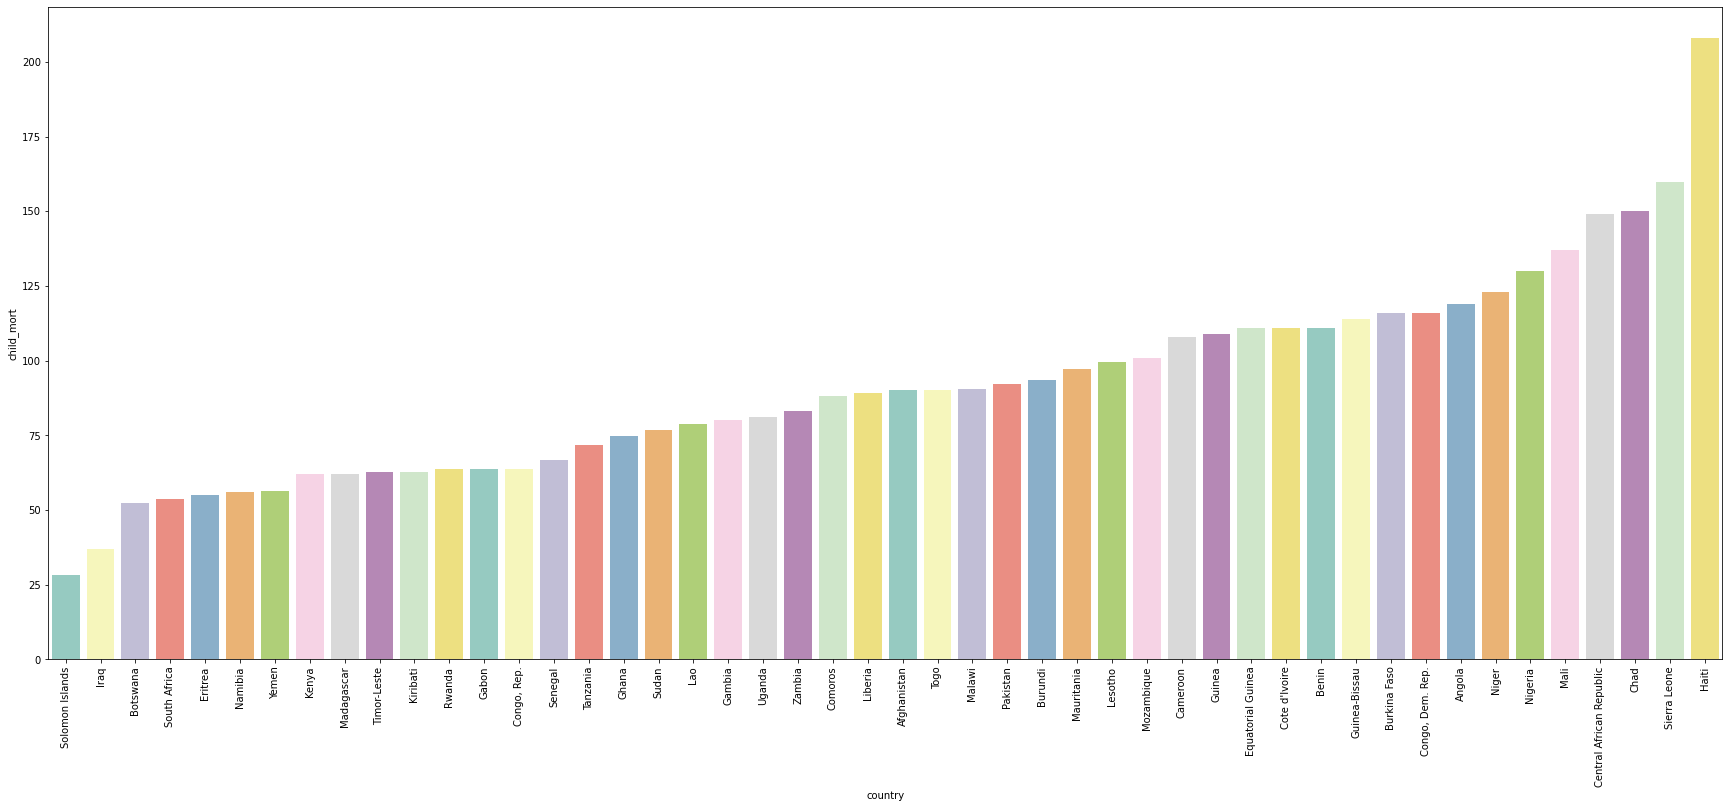

In [73]:
plt.figure(figsize=(30,12))
child_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_under,palette='Set3')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Under-Developed Countries Child mortality Ranking',fontsize=15)
plt.show()

##### <font color='green'>Top 10 Direst Needy Countries(as per Kmeans)</font>

We'll select countries who's gdpp is less than 1909(mean gdpp), child mortality is > 92(mean child_mort) and income <=3897.35 and select top 10 countries

In [75]:
k_needy=data[data['gdpp']<=1909]
k_needy=k_needy[k_needy['child_mort']>= 92]
k_needy=k_needy[k_needy['income']<= 3897]
k_needy=pd.merge(k_needy,pca_data.loc[:,'ClusterID'],left_index=True,right_index=True)
k_needy=k_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
#Top 10 countries having dire need of aid based on overall conditions
print('\nTop 10 countries having dire need of aid based on overall conditions\n')
for countries in k_needy.country[:10]:
    print(countries)


Top 10 countries having dire need of aid based on overall conditions

Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti


**This output is based on k mean clustering . Just to be sure lets Try on Heirarchical Clustering as well**

### Hierarchical Clustering 

##### <font color='red'>Single Linkage</font>

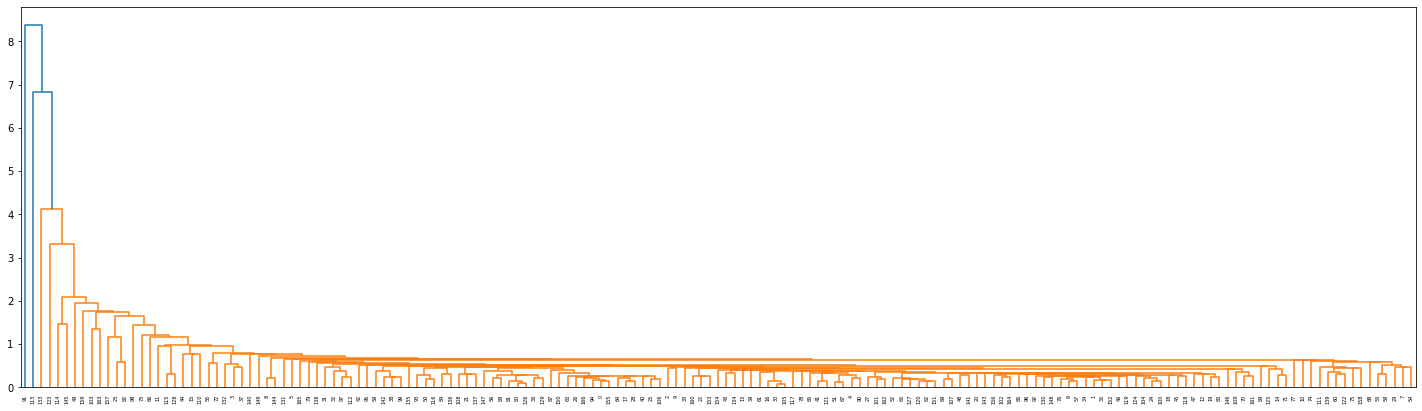

In [45]:
mergings=linkage(pca_data.iloc[:,:5],method='single',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)

In single linkage we can not figure out anything descriptively.

##### <font color='red'>Complete Linkage</font>

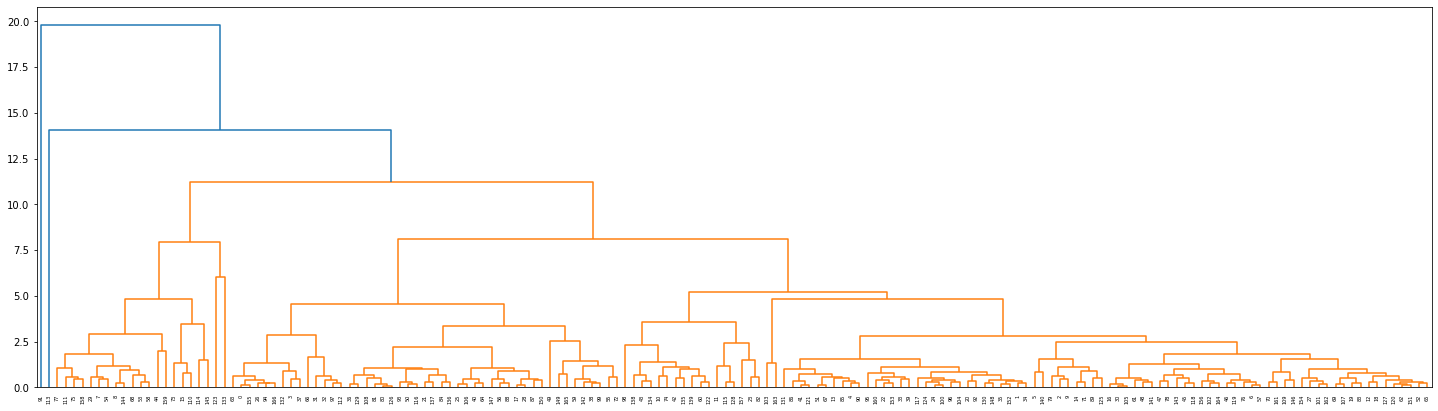

In [46]:
mergings=linkage(pca_data.iloc[:,:5],method='complete',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)

**Now analysisng complete linkage dendrogram, We can say 3 clusters is a good choice**

In [47]:
h_clusters=cut_tree(mergings,n_clusters=3)
pca_data['H_ClusterID']=h_clusters.reshape(-1)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,H_ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [49]:
final_df=pd.merge(final_df,pca_data.loc[:,'H_ClusterID'], left_index=True,right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Clustered Countries,H_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,Developing,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,Developing,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,Developing,0


In [50]:
Cluster_GDPP_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).income.mean())
H_mean_df = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)
H_mean_df

,gdpp,child_mort,income
H_ClusterID,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [51]:
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
Developing,7979.912088,20.357143,13968.021978
Developed,48114.285714,5.046429,50178.571429
Under-developed,1909.208333,91.610417,3897.354167


By comparing averages of K-means and Hierarchical Clustering, we can conclude that       

Cluster 2 belongs to Under-Developed Countries        

Cluster 1 belongs to Developed Countries             

Cluster 0 belongs to Developing Countries        

In [52]:
H_needy=data[data['gdpp']<=2330]
H_needy=H_needy[H_needy['child_mort']>= 130]
H_needy=H_needy[H_needy['income']<= 3897.35]
H_needy=pd.merge(H_needy,pca_data.loc[:,'H_ClusterID'],left_index=True,right_index=True)
H_needy=H_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
#top 10 developed countries based on childmort
print('Countries having dire need of aid based on Hierarchical clustering are as follows:\n')
for countries in H_needy.country:
    print(countries)

Countries having dire need of aid based on Hierarchical clustering are as follows:

Sierra Leone
Central African Republic
Haiti
Mali
Chad


# APRIORI

In [3]:
data.child_mort.max()

208.0

In [4]:
data.child_mort.min()

2.6

In [5]:
data['child_mortality']= pd.cut(data['child_mort'], bins=[0,70,140,210], include_lowest=True, labels=['low_mortality', 'avg_mortality', 'high_mortality'])


In [6]:
data.exports.max()

200.0

In [7]:
data.exports.min()

0.109

In [8]:
data['Exports']= pd.cut(data['exports'], bins=[0,70,140,210], include_lowest=True, labels=['low_ex', 'avg_ex', 'high_ex'])


In [9]:
data.health.min()

1.81

In [10]:
data.health.max()

17.9

In [11]:
data['Health']= pd.cut(data['health'], bins=[0,6,12,18], include_lowest=True, labels=['low_h', 'avg_h', 'high_h'])


In [12]:
data.imports.min()

0.0659

In [13]:
data.imports.max()

174.0

In [14]:
data['Imports']= pd.cut(data['imports'], bins=[0,60,120,180], include_lowest=True, labels=['low_imp', 'avg_imp', 'high_imp'])


In [15]:
data.income.min()

609

In [16]:
data.income.max()

125000

In [17]:
data['Income']= pd.cut(data['income'], bins=[0,42000,84000,126000], include_lowest=True, labels=['low_inc', 'avg_inc', 'high_inc'])


In [18]:
data.inflation.min()

-4.21

In [19]:
data.inflation.max()

104.0

In [20]:
data['Inflation']= pd.cut(data['inflation'], bins=[-4,33,71,108], include_lowest=True, labels=['low_inf', 'avg_inf', 'high_inf'])


In [21]:
data.life_expec.min()

32.1

In [22]:
data.life_expec.max()

82.8

In [23]:
data['Life_expec']= pd.cut(data['life_expec'], bins=[30,50,70,90], include_lowest=True, labels=['low_life', 'avg_life', 'high_life'])


In [24]:
data.total_fer.min()

1.15

In [25]:
data.total_fer.max()

7.49

In [26]:
data['Total_fer']= pd.cut(data['total_fer'], bins=[0,3,6,9], include_lowest=True, labels=['low_fertility', 'avg_fertility', 'high_fertility'])


In [27]:
data.gdpp.min()

231

In [28]:
data.gdpp.max()

105000

In [29]:
data['Gdpp']= pd.cut(data['gdpp'], bins=[0,35000,70000,105000], include_lowest=True, labels=['low_gdp', 'avg_gdp', 'high_gdp'])


In [30]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mortality,Exports,Health,Imports,Income,Inflation,Life_expec,Total_fer,Gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,avg_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,avg_life,avg_fertility,low_gdp
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,low_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,low_mortality,low_ex,low_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,avg_mortality,low_ex,low_h,low_imp,low_inc,low_inf,avg_life,high_fertility,low_gdp
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,low_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp


In [31]:
data.drop(['child_mort', 'exports', 'health', 'imports','income', 'inflation','life_expec', 'total_fer', 'gdpp'], axis='columns', inplace=True)

In [32]:
data.head()

,country,child_mortality,Exports,Health,Imports,Income,Inflation,Life_expec,Total_fer,Gdpp
0,Afghanistan,avg_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,avg_life,avg_fertility,low_gdp
1,Albania,low_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp
2,Algeria,low_mortality,low_ex,low_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp
3,Angola,avg_mortality,low_ex,low_h,low_imp,low_inc,low_inf,avg_life,high_fertility,low_gdp
4,Antigua and Barbuda,low_mortality,low_ex,avg_h,low_imp,low_inc,low_inf,high_life,low_fertility,low_gdp


In [33]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, 7)]) #j is columns

In [34]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.03, min_confidence = 0.7, min_length = 2)

In [35]:
results = list(rules)

In [36]:
results

[RelationRecord(items=frozenset({'low_ex'}), support=0.8982035928143712, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'low_ex'}), confidence=0.8982035928143712, lift=1.0)]),
 RelationRecord(items=frozenset({'low_imp'}), support=0.7664670658682635, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'low_imp'}), confidence=0.7664670658682635, lift=1.0)]),
 RelationRecord(items=frozenset({'low_inc'}), support=0.9041916167664671, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'low_inc'}), confidence=0.9041916167664671, lift=1.0)]),
 RelationRecord(items=frozenset({'low_inf'}), support=0.9760479041916168, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'low_inf'}), confidence=0.9760479041916168, lift=1.0)]),
 RelationRecord(items=frozenset({'low_mortality'}), support=0.8023952095808383, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add

In [37]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

In [38]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [39]:
# Show top 7 higher lift scores
rank.sort_values('Lift', ascending=False).head(7)

,Association,Lift
192,"[avg_h, low_inf, avg_ex, avg_imp, low_mortality]",5.3871
119,"[avg_ex, avg_imp, avg_h, low_mortality]",5.21875
118,"[avg_ex, avg_imp, low_inf, avg_h]",4.77143
40,"[avg_ex, avg_imp, avg_h]",4.63889
225,"[avg_h, low_inf, low_inc, avg_ex, avg_imp, low...",4.47321
191,"[avg_h, low_inc, avg_ex, avg_imp, low_mortality]",4.31897
46,"[avg_ex, avg_imp, low_mortality]",4.10045


#### Conclusion

I Choose K-Means Clustering Algorithm over Hierarchical Clustering Algorithm because:    
The clusterID value counts were properly divided and visualizing each cluster was possible.     
The countries in dire need of aid by K-Means (17) were more than by Hierarchical Clustering(5)     

After comparing both K-means and Hierarchical clustering method, I am going with the K-means outcomes as the plots are clearly visible. As in both the methods, the produced mean for underdeveloped countries was almost same. i.e. deciding no. of clusters as 3 was profitable.        

After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the countries.              

Here, the countries are categorised into list of developed countries, developing countries and under-developed countries.           

In Developed countries, we can see the GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.           

In Developing countries and Under-developed countries, the GDP per capita and income are low and child-mort is high. Specially, for under-developed countries, the death rate of children is very high.

#### Recommendations

From bar chats, we can clearly see the socio-economic and heath situation of the under developed countries.
In countries like Haiti, Sierra Leone, Chad, etc., the death rate of children under 5 years of age per 1000 (child-mort) is high.            
Countries like Burundi, Congo, Niger, etc., GDP per capita is very low & the income per person is also low. So, these countries are considered as Poor countries.            
If Child Mortality Rate is decreased and GDPP , Income is increased in Under-developed countries, the need will be resolved.          

## THANK YOU !!!